In [1]:
# Convolutional Neural Network for Fashion Product Classification

In [2]:
### Imports

In [3]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
### Load train and test labels

In [5]:
test = pd.read_csv("test.csv",
           header=0, 
           sep="	").dropna()
test

,imageid,label,productname
0,21131,Topwear,s.Oliver Women Solid White Top
1,27837,Others,Bulchee Men Plain Jeans Black Belt
2,47649,Shoes,Carlton London Men Brown Shoes
3,49717,Others,Park Avenue Black & Red Checked Tie
4,4868,Topwear,Levis Kids Boy's Darby Orange Polo Tshirt
...,...,...,...
3995,7928,Topwear,Proline Men Olive Green Polo T-shirt
3996,21254,Bags,Skybags Unisex Maroon Duffle Bag
3997,58463,Others,Fossil Men Black Belt
3998,38025,Watches,Q&Q Women Steel Dial Watch


In [6]:
train = pd.read_csv("train.csv",
           header=0, 
           sep="	").dropna()
train

,imageid,label,productname
0,2653,Bags,Murcia Women Leather Office Grey Bag
1,55997,Others,Colorbar Velvet Matte Temptation Lipstick 24MA
2,2640,Shoes,Carlton London Men Brown Formal Shoes
3,40565,Topwear,W Women Maroon Kurta
4,38932,Bottomwear,Gini and Jony Girls Pink Leggings
...,...,...,...
40436,5815,Topwear,Puma Men's Sports Grey T-shirt
40437,55200,Others,Lakme Lip Love Charmer Lip Conditioner
40438,11294,Bottomwear,Wrangler Men Blue Floyd Jeans
40439,30620,Topwear,Nike Men Printed Green T-shirt


In [7]:
### Prepare description features

In [33]:
xw_train = train['productname']
xw_test = test['productname']
y_train = train['label']
y_test = test['label']

In [34]:
xw_train.head(3)

0              Murcia Women Leather Office Grey Bag
1    Colorbar Velvet Matte Temptation Lipstick 24MA
2             Carlton London Men Brown Formal Shoes
Name: productname, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
xw_train.isna().sum()

0

In [37]:
max_vocab = 500
count_vect = CountVectorizer(max_features=max_vocab)
xw_train = count_vect.fit_transform(xw_train)
xw_test = count_vect.transform(xw_test)

In [38]:
# count_vect.get_feature_names()

In [39]:
xw_train = xw_train.toarray()
xw_test = xw_test.toarray()

In [40]:
labels = y_train.unique().tolist()
labels

['Bags',
 'Others',
 'Shoes',
 'Topwear',
 'Bottomwear',
 'Innerwear',
 'Eyewear',
 'Jewellery',
 'Sandal',
 'Watches',
 'Fragrance',
 'Wallets',
 'Makeup']

In [41]:
y_train = to_categorical(y_train.apply(lambda x: labels.index(x)).to_numpy())
y_test = to_categorical(y_test.apply(lambda x: labels.index(x)).to_numpy())

In [42]:
xw_train.shape

(40435, 500)

### Text NN Model Design

In [57]:
model_input = Input(shape=(max_vocab), name='text_input')

x = Dense(200)(model_input)
x = Dense(100)(x)
x = Dense(20)(x)

model_output = Dense(13, activation='softmax')(x)

mlp = Model(model_input, model_output, name="textmlp")
mlp.summary()


Model: "textmlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      [(None, 500)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_19 (Dense)             (None, 13)                273       
Total params: 122,593
Trainable params: 122,593
Non-trainable params: 0
_________________________________________________________________


In [58]:
mlp.compile(optimizer='adam', 
           loss='CategoricalCrossentropy',
           metrics=['accuracy'])

In [59]:
history = mlp.fit(xw_train, y_train, epochs=10, validation_data = (xw_test, y_test))

Epoch 1/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.4085 - accuracy: 0.8852 - val_loss: 0.0673 - val_accuracy: 0.9817
Epoch 2/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.0620 - val_accuracy: 0.9825
Epoch 3/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0615 - accuracy: 0.9826 - val_loss: 0.0717 - val_accuracy: 0.9795
Epoch 4/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0577 - accuracy: 0.9831 - val_loss: 0.0674 - val_accuracy: 0.9817
Epoch 5/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0555 - accuracy: 0.9834 - val_loss: 0.0648 - val_accuracy: 0.9822
Epoch 6/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0641 - val_accuracy: 0.9832
Epoch 7/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0656 - val_accuracy:

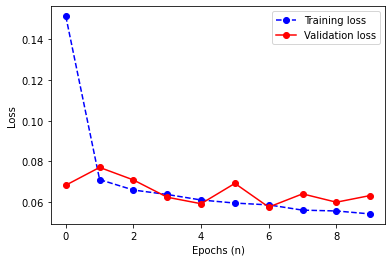

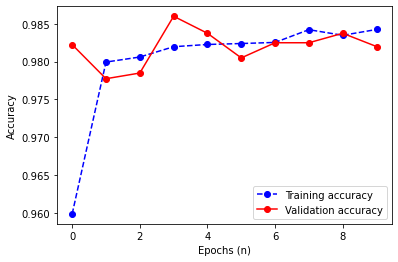

In [56]:
plt.plot(history.history['loss'], 'bo--')
plt.plot(history.history['val_loss'], 'ro-')
plt.ylabel('Loss')
plt.xlabel('Epochs (n)')
plt.legend(['Training loss', 'Validation loss'])
plt.show()
plt.plot(history.history['accuracy'], 'bo--')
plt.plot(history.history['val_accuracy'], 'ro-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs (n)')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()